# Derivatives Lab

This lab allows students to experiment with different differentiation methods, including symbolic, finite difference, complex step differentiation, and automatic differentiation.

## Symbolic Differentiation with SymPy

We first try out symbolic differentiation using `scipy`.
This is very similar to the class notes, except we will take derivatives of the $\text{sinc}(x) = \sin(x) / x$.

In [1]:
# HANDSON: make sure that sympy is installed

!pip install sympy

import sympy as sp


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
# HANDSON: use sympy to define the equation f(x) = sin(x) / x ...

x = sp.symbols('x')
f = sp.sin(x) / x

In [3]:
# HANDSON: ... and get its derivative

f_prime = sp.diff(f,x)
f_prime_simplified = sp.simplify(f_prime)

In [4]:
# Display f'(x)

f_prime

cos(x)/x - sin(x)/x**2

In [5]:
# Display simplified f'(x)

f_prime_simplified

(x*cos(x) - sin(x))/x**2

In [6]:
# We didn't do this in the notes,
# but it is possible to obtain numerical values of functions from sympy.

display(f.evalf(subs={x:1}))
display(f_prime_simplified.evalf(subs={x:1}))

0.841470984807897

-0.301168678939757

In [ ]:
# HANDSON: modify function `f(x)` and confirm that `sympy` is able to
# compute its derivatives


To help visualize the results of derivative, let's copy the plotting function from the class notes here:

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Callable

def mkplot(g, X, Fp):
    if isinstance(g, Callable):
        f = g
    else:
        f = lambda x: g.evalf(subs={'x': x})
        
    Xd = np.linspace(min(X), max(X), num=1001)
    Fd = [f(x) for x in Xd]
    
    plt.plot(Xd, Fd, lw=5, alpha=0.25)
    for (x, fp) in zip(X, Fp):
        y = f(x)
        plt.plot(
            [x-0.05,    x+0.05],
            [y-0.05*fp, y+0.05*fp],
        )

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1345: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


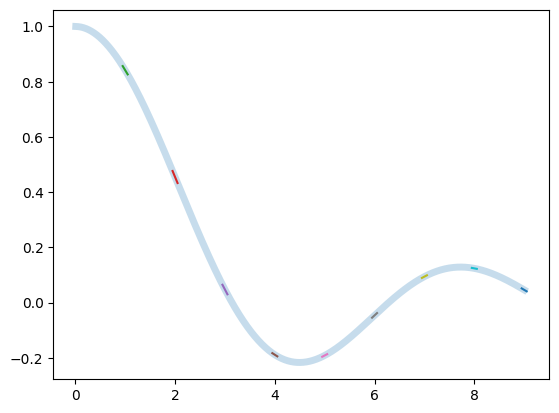

In [8]:
X       = range(10)
F_prime = [f_prime.evalf(subs={'x':x}) for x in X]

mkplot(f, X, F_prime)

In [10]:
def fp_complexstep(f, x, h):
    return np.imag(f(x + 1j * h)) / h

## Enhancing Dual Number Autodiff

In the class, we implemented a Dual-number based autodiff scheme.
It supports many basic operators except division and power.

Try implementing these extra operators and test them out with our visualization tool.

In [11]:
def V(x):
    """Select the value from a dual number.

    Work for both python built-in numbers (often used in function) and dual numbers.
    """
    if isinstance(x, Dual):
        return x[0]
    else:
        return x

def D(x):
    """Select the derivative from a dual number.

    Work for both python built-in numbers (often used in function) and dual numbers.
    """
    if isinstance(x, Dual):
        return x[1]
    else:
        return 0

In [12]:
class Dual(tuple):
    """Dual number for implementing autodiff in pure python"""

    def __new__(self, v, d=1): # tuple is immutable so we cannot use __init__()
        return tuple.__new__(Dual, (v, d))

    def __add__(self, r):
        return Dual(
            V(self) + V(r),
            D(self) + D(r),
        )
    def __radd__(self, l):
        return self + l # addition commutes

    def __sub__(self, r):
        return Dual(
            V(self) - V(r),
            D(self) - D(r),
        )
    def __rsub__(self, l):
        return Dual(
            V(l) - V(self),
            D(l) - D(self),
        )

    def __mul__(self, r):
        return Dual(
            V(self) * V(r),
            D(self) * V(r) + V(self) * D(r),
        )
    def __rmul__(self, l):
        return self * l # multiplication commutes

    def __truediv__(self, r):
        return Dual(
            V(self) / V(r),
            V(r) * D(self) - D(r)*V(self) / (V(r)**2)
        )
    def __rtruediv__(self, l):
        return Dual(
            V(l) / V(self),
            V(r) * D(self) - D(r)*V(self) / (V(r)**2)
        )

    def __pow__(self, r): # assume r is constant
        if r == 0:
            return ... # HANDSON: implement chain-rule for power
        elif r == 1:
            return ... # HANDSON: implement chain-rule for power
        else:
            return Dual(
                V(self)**r,
                ..., # HANDSON: implement chain-rule for power
            )

In [13]:
def sin(x):
    return Dual(
        np.sin(V(x)),
        np.cos(V(x)) * D(x)  # chain rule: d/dx sin(x) = cos(x) * x'
    )

TypeError: 'ellipsis' object is not iterable

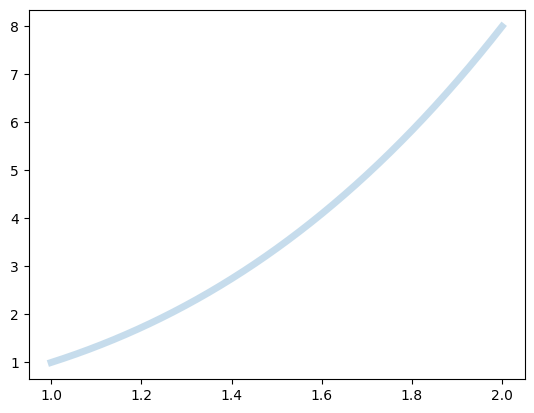

In [14]:
def f(x):
    return x**3
    # return sin(x) / x

X     = np.linspace(1,2,num=11)
F, Fp = f(Dual(X))

mkplot(f, X, Fp)